# Title: Heart Failure Clinical Records Dataset

Source: The dataset was collected at the Faisalabad Institute of Cardiology and the Allied Hospital in
Faisalabad, Punjab, Pakistan, during the period of April to December in 2015. It was later made available on
Kaggle.


Description: The dataset comprises medical records of 299 patients diagnosed with heart failure. These records
include various clinical, body, and lifestyle information of the patients. The dataset encompasses 13 features,
providing insights into the patients' health status and potential risk factors for heart failure.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# 1. What is the distribution of age among heart failure patients in the dataset

Text(0, 0.5, 'Count')

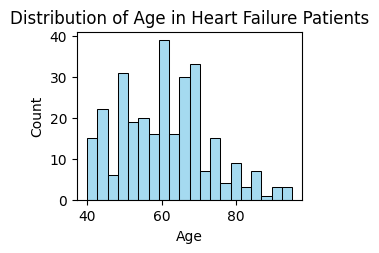

In [10]:
plt.subplot(2, 2, 1)
sns.histplot(data=data, x='age', bins=20, color='skyblue')
plt.title('Distribution of Age in Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Count')

### Conclusion:

1. The minimum age is 40 and the max is 90.
2. The histogram for univariate analyis of the feature 'age' shows that the most heart failure pateints are in the range between 50 and 70.
3. The distribution is slightly, right or positive skewed.
4. The average age is ~60 years old.

#  2. How does the death rate vary with age

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '31-40'),
  Text(1, 0, '41-50'),
  Text(2, 0, '51-60'),
  Text(3, 0, '61-70'),
  Text(4, 0, '71-80'),
  Text(5, 0, '81-90'),
  Text(6, 0, '91-100')])

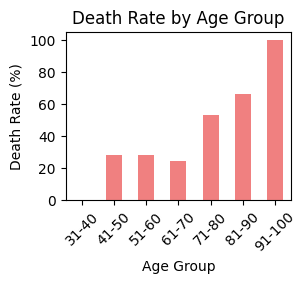

In [11]:
data['age_group'] = pd.cut(data['age'], bins=[30, 40, 50, 60, 70, 80, 90, 100],
                          labels=['31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

death_by_age = data.groupby('age_group')['DEATH_EVENT'].mean() * 100

plt.subplot(2, 2, 2)
death_by_age.plot(kind='bar', color='lightcoral')
plt.title('Death Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45)

In [16]:
correlation = data['age'].corr(data['DEATH_EVENT'])
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.2537285430880036


## Conclusion:
1. The death rate seems to be directly proportional to the age

2. The higher death rates are in patient age more than 80 years old.

# 3. What is the percentage of male and female patients in the dataset?

In [18]:
gender_counts = data['sex'].value_counts()
gender_percentages = gender_counts / len(data) * 100

gender_percentages

,count
sex,
1,64.882943
0,35.117057


Text(0.5, 1.0, 'Gender Distribution of Patients')

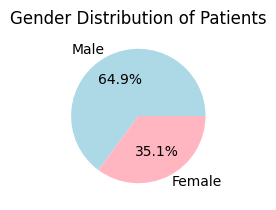

In [19]:
plt.subplot(2, 2, 3)
plt.pie(gender_percentages, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
plt.title('Gender Distribution of Patients')

## Conclusion:
1. Feature 'sex' is imbalance
2. 35% are female and ~65% are male patients.


# 4. How does the platelet count vary among different age groups?

In [23]:
data.platelets.describe()

,platelets
count,299.000000
mean,263358.029264
std,97804.236869
min,25100.000000
25%,212500.000000
50%,262000.000000
75%,303500.000000
max,850000.000000


Text(0, 0.5, 'Count')

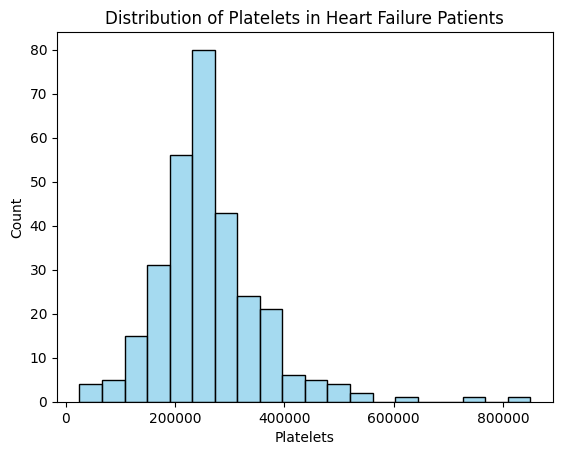

In [26]:
sns.histplot(data, x='platelets', bins=20, color='skyblue')
plt.title('Distribution of Platelets in Heart Failure Patients')
plt.xlabel('Platelets')
plt.ylabel('Count')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '31-40'),
  Text(1, 0, '41-50'),
  Text(2, 0, '51-60'),
  Text(3, 0, '61-70'),
  Text(4, 0, '71-80'),
  Text(5, 0, '81-90'),
  Text(6, 0, '91-100')])

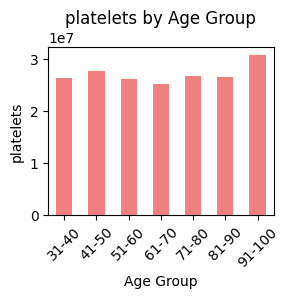

In [25]:
data['age_group'] = pd.cut(data['age'], bins=[30, 40, 50, 60, 70, 80, 90, 100],
                          labels=['31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

death_by_age = data.groupby('age_group')['platelets'].mean() * 100

plt.subplot(2, 2, 2)
death_by_age.plot(kind='bar', color='lightcoral')
plt.title('platelets by Age Group')
plt.xlabel('Age Group')
plt.ylabel('platelets')
plt.xticks(rotation=45)

## Conclusion:
1. Platletes count seems to be in the range between 250000 and 350000 for all the age group
2. For age group 60 and 70, the platelets are the lowest in range.
3. For age group 90-100, the plateletes are the highest, more than 300000.

# 5. Is there a correlation between creatinine and sodium levels in the blood?

In [32]:
subset = data[['serum_creatinine', 'serum_sodium']]

correlation = subset['serum_creatinine'].corr(subset['serum_sodium'])
print(f'Correlation coefficient: {correlation}')


Correlation coefficient: -0.1890952100911741


<Axes: >

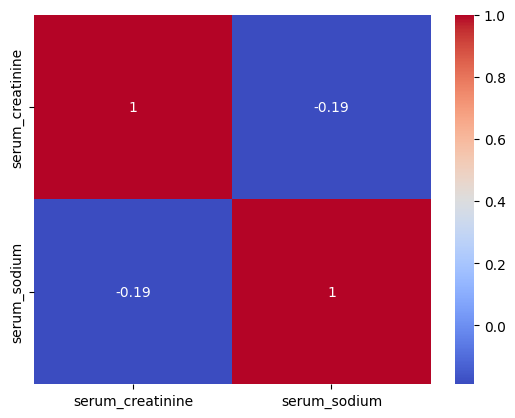

In [30]:
subset = data[['serum_creatinine', 'serum_sodium']]

sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')

## Conclusion:

1. The correlation is -0.19, states that there is a very weak and negative linear relationship between sodium and ceratinine

# 6. How does the prevalence of high blood pressure differ between male and female patients?

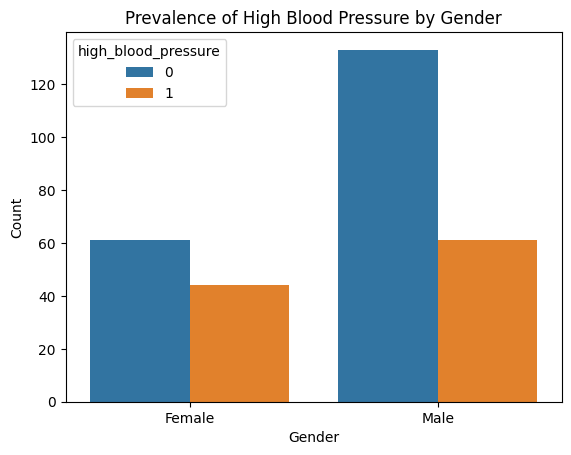

In [35]:
sns.countplot(x='sex', hue='high_blood_pressure', data=data)

plt.title('Prevalence of High Blood Pressure by Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Conclusion:

1. Male is having higher BP than female.
2. The ratio of BP, 0/1 in female is low as compared to male.

# 7. What is the relationship between smoking habits and the occurrence of heart failure

In [46]:
data.smoking.value_counts()

,count
smoking,
0,203
1,96


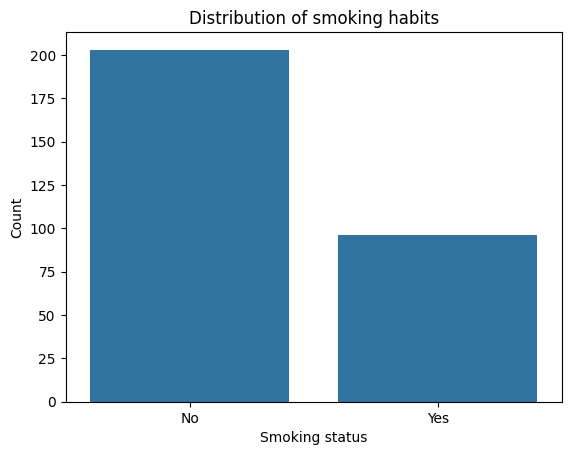

In [38]:
sns.countplot(x='smoking', data = data)
plt.title('Distribution of smoking habits')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Smoking status')
plt.ylabel('Count')
plt.show()

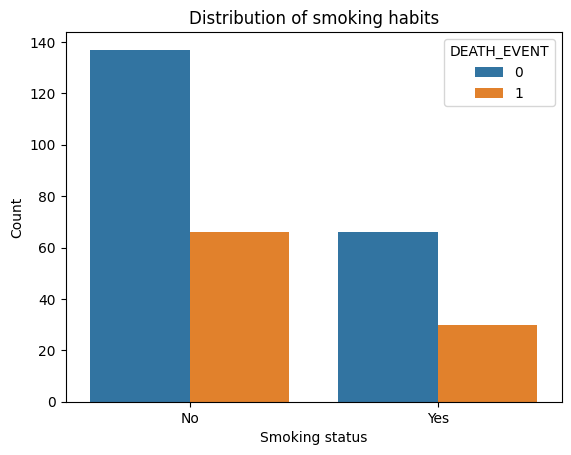

In [44]:
sns.countplot(x='smoking', hue='DEATH_EVENT', data=data)
plt.title('Distribution of smoking habits')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Smoking status')
plt.ylabel('Count')
plt.show()

In [47]:
from scipy.stats import chi2_contingency

# Create a contingency table for smoking status and DEATH_EVENT
contingency_table = pd.crosstab(data['smoking'], data['DEATH_EVENT'])

# Perform the Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square test p-value: {p}')


Chi-square test p-value: 0.9317652998235507


## Conclusion:

1. The univariate analysis of feature smoking shows that this feature is imbalance, ~68% are non smokers and ~32% are the smokers

2. The significance value and the plot states that there is no significance relationship between the heart failure and smoking as such.

# 8. Are there any noticeable patterns in the distribution of death events across different age groups?

In [50]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['age'], data['DEATH_EVENT'])

# Perform the Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square test p-value: {p}')


Chi-square test p-value: 0.015227406432460549


## Conclusion:

1. As seen in plot under section 2, it seems that yes there is a noticiable patterns in the distribution of death events across different age groups and the higher death event is hapening for the age group more than 80 year old.

2. The chi-square test also states that the relationship between them is statiscally significant which also means that the older age group is having higher chances of death event.

# 9. Is there any significant difference in ejection fraction between patients with and without diabetes?

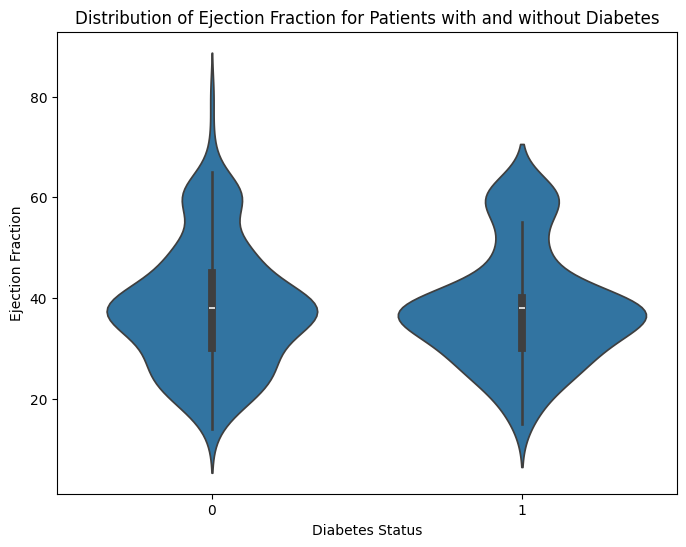

In [54]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='ejection_fraction', data=data)

# Add title and labels
plt.title('Distribution of Ejection Fraction for Patients with and without Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Ejection Fraction')

# Show the plot
plt.show()

## Conclusion:

1. The mean or average of all diabetes wrt ejection fraction is same i.e. near to 40.

2. The ejection fraction in non diabetic patient is more than 70, may be an outlier. but in diabetic pateint its max is ~70.

# 10. How does the serum creatinine level vary between patients who survived and those who did not?

In [56]:
data.groupby('DEATH_EVENT')['serum_creatinine'].mean()

,serum_creatinine
DEATH_EVENT,
0,1.184877
1,1.835833


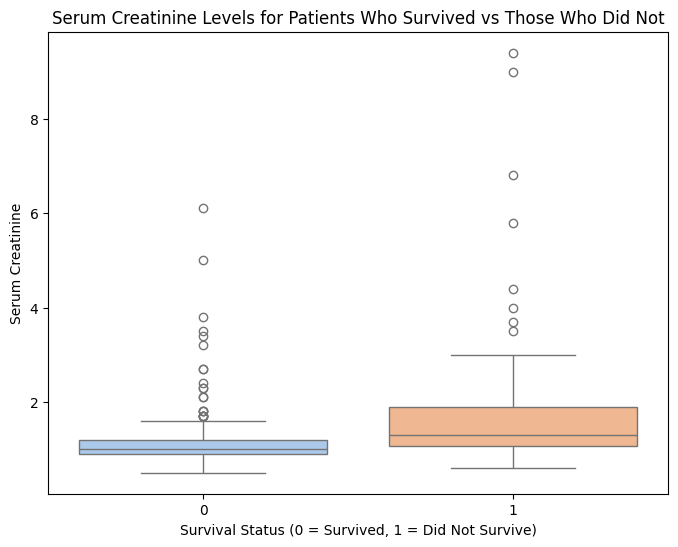

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data, palette='pastel')

# Add title and labels
plt.title('Serum Creatinine Levels for Patients Who Survived vs Those Who Did Not')
plt.xlabel('Survival Status (0 = Survived, 1 = Did Not Survive)')
plt.ylabel('Serum Creatinine')

# Show the plot
plt.show()

## Conclusion:

It seems that the serum creatinine level is higher in pateints who survived comparitively to the one's who did not.